# Reading and training tom and jerry dataset from kaggle

In [20]:
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as tf
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision.models import vgg16
from torchvision.models import resnet18


from pathlib import Path
from matplotlib import pyplot as plt

In [14]:
device = 'cuda'

In [2]:
data_path = Path(
    '/home/ramin/ramin_programs/files/datasets/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry')

In [3]:

tr = tf.Compose(
    [tf.Resize([90,160]),tf.ToTensor(),]
)

image_folder = datasets.ImageFolder(data_path,
                                    transform=tr)

In [4]:
data_loader = DataLoader(image_folder,
                         batch_size=32,
                         shuffle=True
                         )

tensor(1)


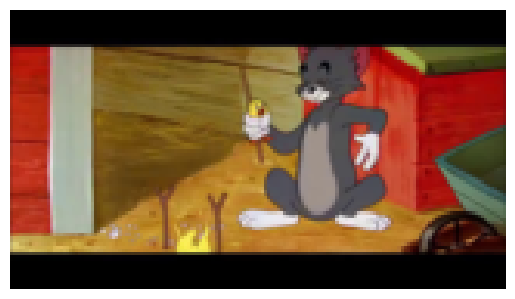

In [5]:
for tensor_image, label in data_loader:
    figure, axes = plt.subplots(1,1)

    axes.imshow(tf.ToPILImage()(tensor_image[0]))
    axes.set_axis_off()
    print(label[0])
    break

In [21]:
m1 = resnet18()

In [23]:
m1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
# model.fc = nn.Linear()
# model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [26]:
model.classifier[1] = nn.Linear(1280,4)

In [29]:
model = model.to(device)

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [33]:
def train(model, data_loader, loss_fn, optimizer):
    data_size = len(data_loader.dataset)
    model.train()
    for i, (images, labels) in enumerate(data_loader):

        images = images.to(device)
        labels = labels.to(device)

        y_pred = model(images)
        loss = loss_fn(y_pred, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i%100 == 0:
            print(f'{loss.item():>7f} {(i+1)*len(images)}/{data_size}')

In [34]:
def test(model, data_loader, loss_fn):
    data_size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            y_pred = model(images)
            test_loss += loss_fn(y_pred, labels).item()
            correct += (y_pred.argmax(1) ==
                        labels).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= data_size

    print(f'loss: {test_loss}, accuracy: {correct}')

In [35]:
for epoch in range(5):
    train(model, data_loader, loss_fn, optimizer)
    test(model, data_loader, loss_fn)
    print(f'epoch {epoch} is over')

1.561074 32/5478
1.657819 3232/5478
loss: 1.5632955078468767, accuracy: 0.16502373128879153
epoch 0 is over
1.581160 32/5478
1.648135 3232/5478
loss: 1.5760882240395213, accuracy: 0.16502373128879153
epoch 1 is over
1.574025 32/5478
1.363335 3232/5478
loss: 1.5745544544486112, accuracy: 0.16885724717050019
epoch 2 is over
1.479260 32/5478
1.552969 3232/5478
loss: 1.5671504555746567, accuracy: 0.16776195691858342
epoch 3 is over
1.622594 32/5478
1.584025 3232/5478
loss: 1.5804435479086498, accuracy: 0.1606425702811245
epoch 4 is over
